# ***CineClassify***

In dit notebook werken we aan onze opdracht van CineClassify. In dit notebook zal er een pipeline worden gebouwd om de data in te laden en er een dataframe van te maken. Deze dataframe kan worden gebruikt om de data duidelijk in te zien voor het datascience team.

In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import requests
from bs4 import BeautifulSoup

from time import sleep
from random import randint

## **IMDb Webscraping**

Om een deel van de data te krijgen is het nodig om data te verkrijgen van het internet. Dit wordt gedaan door middel van een techniek genaamd webscraping. Door middel van de BeautifullSoup library voor Python is het gemakkelijk gemaakt om deze stappen te ondernemen. Door het bekijken van de HTML code van de website kunnen de nodige elementen gevonden worden en kan de data opgehaald worden van de website. Voordat we beginnen met het coderen van de soup worden er eerst een paar nodige elementen aangemaakt.

In [117]:
# Aanmaken van lijsten om de data in te stoppen
titel = []
jaartal = []
lengte = []
imdb_scores = []
meta_scores = []
stemmen = []
us_omzet = []
omschrijving = []
certificaat = []
genre = []
regisseur = []

# Verkrijgen van de engelse namen van films
en_titel = {'Accept-Language': 'en-US, en;q=0.5'}

# Aanmaken van lijst voor pagina's
pagina = np.arange(1, 1001, 50)

# Aanmaken van de URL
url = ('https://www.imdb.com/search/title/'
       '?groups=top_1000&sort=user_rating,desc&start=')

Nu de basis is aangemaakt kan er begonnen worden met het aanmaken en gebruiken van de soup.

In [118]:
# Zorgen dat de scraping voor elke 50 gaat
for p in pagina:
    # Pakken van URL
    p = requests.get(
        url + str(p) + '&ref_=adv_nxt', headers=en_titel
        )

    # Beginnen van de soup
    soup = BeautifulSoup(p.text, 'html.parser')

    # Zoeken van alle plekken waar de data is te vinden
    films = soup.find_all('div', class_='lister-item mode-advanced')

    # Wachtijd van 2 tot 10 seconden
    sleep(randint(2, 10))

    for item in films:
        # Titel
        titel.append(item.h3.a.text)

        # Jaartal
        jaartal.append(item.h3.find('span', class_='lister-item-year').text)

        # Regisseur
        # regi = 

        # Leeftijd certificatie
        cert = (item.find('span', class_='certificate').text
                if item.p.find('span', class_='certificate') else 'NotFound')
        certificaat.append(cert)

        # Lengte
        runtime = (item.find('span', class_='runtime').text
                    if item.p.find('span', class_='runtime') else 'NotFound')
        lengte.append(runtime)

        # Genre
        gen = (item.find('span', class_='runtime').text
                if item.p.find('span', class_='runtime') else 'NotFound')
        genre.append(gen)

        # IMDb rating
        imdb_scores.append(float(item.strong.text))

        # meta_scores
        m_score = (item.find('span', class_='metascore').text
                    if item.find('span', class_='metascore') else 'NotFound')
        meta_scores.append(m_score)

        # Omschrijving
        desc = item.find_all('p', class_='text-muted')
        omschrijving.append(desc[1].text)

        # Stemmen en Omzet
        so = item.find_all('span', attrs={'name':'nv'})
        stemmen.append(so[0].text)
        us_omzet.append(so[1].text if len(so) > 1 else '-')

    print("-- Iteratie van loop voltooid --")


-- Iteratie van loop voltooid --
-- Iteratie van loop voltooid --
-- Iteratie van loop voltooid --
-- Iteratie van loop voltooid --
-- Iteratie van loop voltooid --
-- Iteratie van loop voltooid --
-- Iteratie van loop voltooid --
-- Iteratie van loop voltooid --


Nu alle lijsten gevuld zijn met de data van de IMDb Top 1000 films kan het in een dataframe gezet worden voor opschoning

In [112]:
# Aanmaken van een dataframe
films = pd.DataFrame(
    {'Film' : titel,
     'Omschrijving' : omschrijving,
     'Age_Rating' : certificaat,
     'Genres' : genre,
     'Jaar' : jaartal,
     'Minuten' : lengte,
     'IMDb_Score' : imdb_scores,
     'Meta_Score' : meta_scores,
     'Stemmen' : stemmen,
     'Omzet (in M)' : us_omzet}
)

# Tonen van de eerste 10 regels
films.head(10)

,Film,Omschrijving,Jaar,Minuten,IMDb_Score,Meta_Score,Stemmen,Omzet (in M)
0,The Shawshank Redemption,"\nOver the course of several years, two convic...",(1994),142 min,9.3,82,"2,816,139",$28.34M
1,The Godfather,"\nDon Vito Corleone, head of a mafia family, d...",(1972),175 min,9.2,100,"1,962,630",$134.97M
2,The Dark Knight,\nWhen the menace known as the Joker wreaks ha...,(2008),152 min,9.0,84,"2,797,656",$534.86M
3,Schindler's List,\nIn German-occupied Poland during World War I...,(1993),195 min,9.0,95,"1,415,619",$96.90M
4,The Lord of the Rings: The Return of the King,\nGandalf and Aragorn lead the World of Men ag...,(2003),201 min,9.0,94,"1,928,417",$377.85M
5,The Godfather Part II,\nThe early life and career of Vito Corleone i...,(1974),202 min,9.0,90,"1,332,499",$57.30M
6,12 Angry Men,\nThe jury in a New York City murder trial is ...,(1957),96 min,9.0,97,"839,016",$4.36M
7,Pulp Fiction,"\nThe lives of two mob hitmen, a boxer, a gang...",(1994),154 min,8.9,95,"2,159,658",$107.93M
8,Fight Club,\nAn insomniac office worker and a devil-may-c...,(1999),139 min,8.8,67,"2,251,009",$37.03M
9,The Lord of the Rings: The Fellowship of the Ring,\nA meek Hobbit from the Shire and eight compa...,(2001),178 min,8.8,92,"1,955,729",$315.54M


In [113]:
print(films['Omschrijving'].iloc[0])


Over the course of several years, two convicts form a friendship, seeking consolation and, eventually, redemption through basic compassion.


## **Opschonen van films DataFrame**

Voordat de data actief wordt opgeschoond wordt de informatie over het DataFrame bekeken.

In [114]:
# Bekijken van info over het dataframe
display(films.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Film          1000 non-null   object 
 1   Omschrijving  1000 non-null   object 
 2   Jaar          1000 non-null   object 
 3   Minuten       1000 non-null   object 
 4   IMDb_Score    1000 non-null   float64
 5   Meta_Score    1000 non-null   object 
 6   Stemmen       1000 non-null   object 
 7   Omzet (in M)  1000 non-null   object 
dtypes: float64(1), object(7)
memory usage: 62.6+ KB


None

In [115]:
# Opschonen van de omschrijving kolom
films['Omschrijving'] = films['Omschrijving'].str.strip()

# Opschonen van de Jaar kolom
films['Jaar'] = films['Jaar'].str.extract('(\d+)').astype(int)

# Opschonen van de Minuten kolom
films['Minuten'] = films['Minuten'].str.extract('(\d+)').astype(int)

# Opschonen van de Meta_score kolom
films['Meta_Score'] = films['Meta_Score'].str.extract('(\d+)')

# Omzetten naar float en NotFound veranderen naar NaN
films['Meta_Score'] = pd.to_numeric(films['Meta_Score'], errors='coerce')

# Opschonen van de Stemmen kolom
films['Stemmen'] = films['Stemmen'].str.replace(',', '').astype(int)

# Opschonen van Omzet kolom
# Weghalen van '$' en 'M'
films['Omzet (in M)'] = films['Omzet (in M)'].map(lambda x: x.lstrip('$').rstrip('M'))

# Omzetten naar float en NotFound veranderen naar NaN
films['Omzet (in M)'] = pd.to_numeric(films['Omzet (in M)'], errors='coerce')

# Tonen van de eerste 10 regels na aanpassingen
films.head(10)

,Film,Omschrijving,Jaar,Minuten,IMDb_Score,Meta_Score,Stemmen,Omzet (in M)
0,The Shawshank Redemption,"Over the course of several years, two convicts...",1994,142,9.3,82.0,2816139,28.34
1,The Godfather,"Don Vito Corleone, head of a mafia family, dec...",1972,175,9.2,100.0,1962630,134.97
2,The Dark Knight,When the menace known as the Joker wreaks havo...,2008,152,9.0,84.0,2797656,534.86
3,Schindler's List,"In German-occupied Poland during World War II,...",1993,195,9.0,95.0,1415619,96.90
4,The Lord of the Rings: The Return of the King,Gandalf and Aragorn lead the World of Men agai...,2003,201,9.0,94.0,1928417,377.85
5,The Godfather Part II,The early life and career of Vito Corleone in ...,1974,202,9.0,90.0,1332499,57.30
6,12 Angry Men,The jury in a New York City murder trial is fr...,1957,96,9.0,97.0,839016,4.36
7,Pulp Fiction,"The lives of two mob hitmen, a boxer, a gangst...",1994,154,8.9,95.0,2159658,107.93
8,Fight Club,An insomniac office worker and a devil-may-car...,1999,139,8.8,67.0,2251009,37.03
9,The Lord of the Rings: The Fellowship of the Ring,A meek Hobbit from the Shire and eight compani...,2001,178,8.8,92.0,1955729,315.54


In [116]:
# Kijken of alle data typen succesvol zijn veranderd
display(films.dtypes)
display(films)

Film             object
Omschrijving     object
Jaar              int32
Minuten           int32
IMDb_Score      float64
Meta_Score      float64
Stemmen           int32
Omzet (in M)    float64
dtype: object

,Film,Omschrijving,Jaar,Minuten,IMDb_Score,Meta_Score,Stemmen,Omzet (in M)
0,The Shawshank Redemption,"Over the course of several years, two convicts...",1994,142,9.3,82.0,2816139,28.34
1,The Godfather,"Don Vito Corleone, head of a mafia family, dec...",1972,175,9.2,100.0,1962630,134.97
2,The Dark Knight,When the menace known as the Joker wreaks havo...,2008,152,9.0,84.0,2797656,534.86
3,Schindler's List,"In German-occupied Poland during World War II,...",1993,195,9.0,95.0,1415619,96.90
4,The Lord of the Rings: The Return of the King,Gandalf and Aragorn lead the World of Men agai...,2003,201,9.0,94.0,1928417,377.85
...,...,...,...,...,...,...,...,...
995,When Marnie Was There,"Due to 12-year-old Anna's asthma, she's sent t...",2014,103,7.6,72.0,45500,0.77
996,Control,"A profile of Ian Curtis, the enigmatic singer ...",2007,122,7.6,78.0,67758,0.87
997,A Very Long Engagement,Tells the story of a young woman's relentless ...,2004,133,7.6,76.0,75340,6.17
998,Shine,"Pianist David Helfgott, driven by his father a...",1996,105,7.6,87.0,55970,35.81


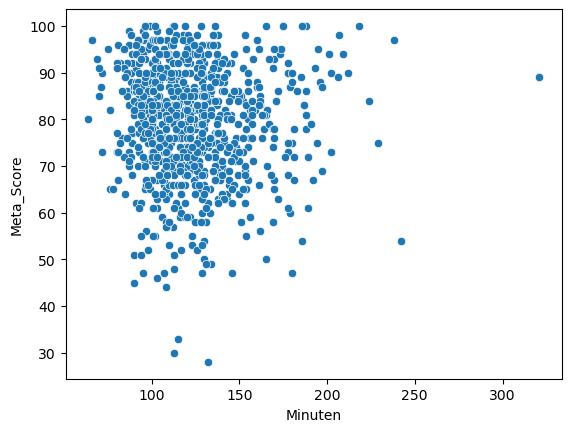

In [93]:
sns.scatterplot(data=films, x='Minuten', y='Meta_Score')
plt.show()